# Rendezvous problem
$$
\begin{align*}
& \min \sum_{i=1}^T \|u_i\|_2^2 + \|v_i\|_2^2 \\
\text{s.t. } & x_{t+1} = Ax_t + Bu_t, \; t = 1,\ldots,T-1\\
& z_{t+1} = Cz_t + Dv_t, \; t = 1,\ldots,T-1\\
& x_T = z_T
\end{align*}
$$

In [0]:
# Source: https://colab.research.google.com/github/amkatrutsa/MIPT-Opt/blob/master/01-Intro/demos.ipynb#scrollTo=W264L1t1p3mF
import numpy as np
import cvxpy as cvx
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

m1 = 1
eta1 = 0.01
m2 = 1
eta2 = 1
tau = 0.01
T = 100
A = np.array([[1, 0, tau, 0], 
              [0, 1, 0, tau], 
              [0, 0, 1 - eta1 * tau / m1, 0], 
              [0, 0, 0, 1 - eta1 * tau / m1]])
B = np.array([[0, 0],
             [0, 0],
             [tau / m1, 0],
             [0, tau / m1]])

C = np.array([[1, 0, tau, 0], 
              [0, 1, 0, tau], 
              [0, 0, 1 - eta2 * tau / m2, 0], 
              [0, 0, 0, 1 - eta2 * tau / m2]])
D = np.array([[0, 0],
             [0, 0],
             [tau / m2, 0],
             [0, tau / m2]])

In [0]:
x0 = np.array([0, 0.1, 1, 1])
z0 = np.array([10, -0.1, -1, 1])

In [48]:
x = cvx.Variable((4, T + 1))
z = cvx.Variable((4, T + 1))
u = cvx.Variable((2, T))
v = cvx.Variable((2, T))

states = []
for t in range(T):
    cost = cvx.sum_squares(u[:, t]) + cvx.sum_squares(v[:, t])
    constr = [x[:, t+1] == A*x[:, t] + B*u[:, t], z[:, t+1] == C*z[:, t] + D*v[:, t]]
    states.append(cvx.Problem(cvx.Minimize(cost), constr))
prob0 = sum(states)
complete_constr = prob0.constraints + [x[:, T] == z[:, T], x[:, 0] == x0, z[:, 0] == z0]
prob = cvx.Problem(prob0.objective, complete_constr)
prob.solve(verbose=True)

-----------------------------------------------------------------
           OSQP v0.5.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2018
-----------------------------------------------------------------
problem:  variables n = 1608, constraints m = 1212
          nnz(P) + nnz(A) = 3616
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on

iter   objective    pri res    dua res    rho        time
   1   0.0000e+00   1.00e+01   1.00e+03   1.00e-01   2.65e-03s
  75   5.1021e+04   1.25e-05   3.33e-09   5.79e+01   3.89e-03s

status:               solved
solution polish:      unsucces

51020.73439605479

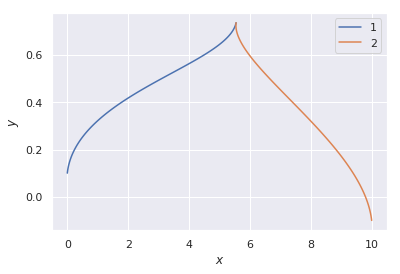

In [51]:
plt.plot(x.value[0, :], x.value[1, :], label="1")
plt.plot(z.value[0, :], z.value[1, :], label="2")
plt.legend()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
# plt.savefig('rendezvous.svg')
plt.show()